# Assignment 1, Representation
- Parsa Torabian
- 20554368
- p2torabi

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'firing rate (Hz)')

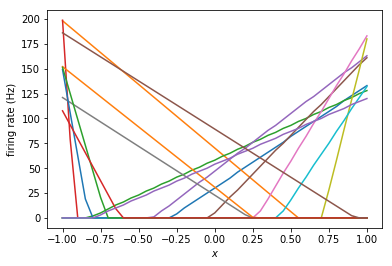

In [1]:
#Question 1.1a
%pylab inline
from BaseNeuron import BaseNeuron
from RectifiedLinear import RectifiedLinear
import numpy as np
from scipy.optimize import curve_fit

#num neurons
N = 16

#Array of encoders
es = np.random.choice([-1, 1], size=N)

xInts = np.random.uniform(-0.95, 0.95, N)
max_rates = np.random.uniform(100, 200, N)

slope = max_rates / (es - xInts);
biases = -1*slope*xInts;
gains = abs(slope)

x = np.arange(-1,1.05,0.05)
A = np.zeros(shape=(size(x),N))

for i in range(0, N):
    neuron = RectifiedLinear(gains[i], biases[i], es[i]);
    a = neuron.tuningSimple(x)
    A[:, i] = a

pyplot.plot(x, A)
xlabel('$x$')
ylabel('firing rate (Hz)')

In [2]:
#Question 1.1b
D = BaseNeuron.decodeIdeal(A, x)
print ("The decoders are: ")
print(D)

The decoders are: 
[ -1.10466504e-04  -1.25600814e-06   1.62689939e-03   2.10371266e-05
   1.01941363e-04   2.50994686e-05   3.04034059e-03   3.74433542e-03
   1.40191225e-05  -1.96311688e-04  -3.18961384e-04  -9.00077169e-03
  -3.75408662e-05  -1.41819597e-06   2.09783629e-03  -1.85809377e-04]


RMSE 0.00151503


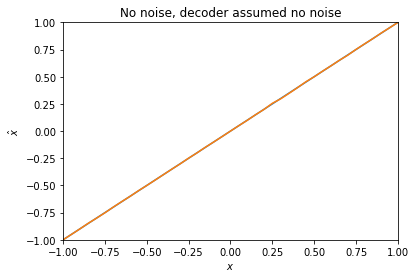

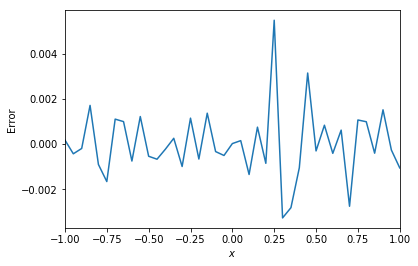

In [3]:
#Question 1.1c
xhat = np.dot(A, D)
error = xhat - x

figure()
title('No noise, decoder assumed no noise')
plot(x, x)
plot(x, xhat)
xlabel('$x$')
ylabel('$\hat{x}$')
ylim(-1, 1)
xlim(-1, 1)

figure()
plot(x, error)
xlabel('$x$')
ylabel('Error')
xlim(-1, 1)

RMSE = np.sqrt(np.average(error**2))
print('RMSE %g' % RMSE)

RMSE 0.446569


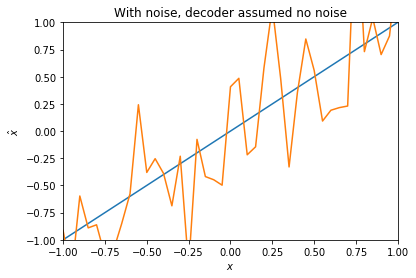

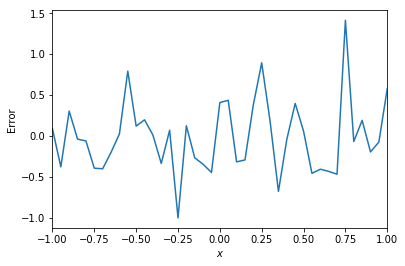

In [4]:
#Question 1.1d, now with noise!

An = A + np.random.normal(scale=0.2*np.max(A), size=shape(A))

xhat2 = np.dot(An, D)
error2 = xhat2 - x

figure()
plot(x, x)
plot(x, xhat2)
title('With noise, decoder assumed no noise')
xlabel('$x$')
ylabel('$\hat{x}$')
ylim(-1, 1)
xlim(-1, 1)

figure()
plot(x, error2)
xlabel('$x$')
ylabel('Error')
xlim(-1, 1)

RMSE2 = np.sqrt(np.average(error2**2))
print('RMSE %g' % RMSE2)

With noise, decoding accounting for noise
RMSE 0.125105
Without noise, decoding accounting for noise
RMSE 0.0697994


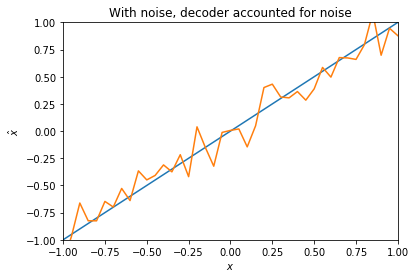

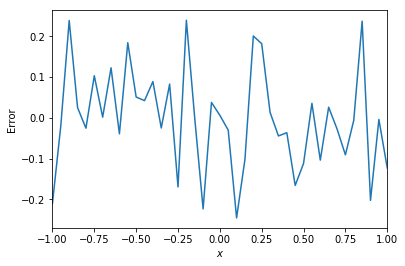

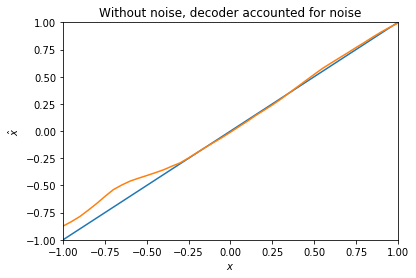

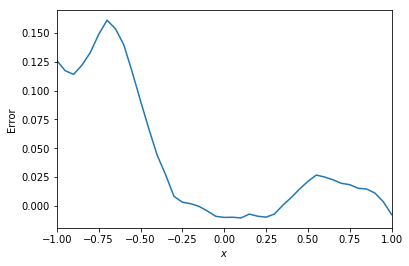

In [5]:
#Question 1.1e
sigma = 0.2
S = size(x)

D2 = BaseNeuron.decode(An, x, sigma)

xhat3 = np.dot(An, D2)
xhat4 = np.dot(A, D2)
error3 = xhat3 - x
error4 = xhat4 - x

figure()
plot(x, x)
plot(x, xhat3)
title('With noise, decoder accounted for noise')
xlabel('$x$')
ylabel('$\hat{x}$')
ylim(-1, 1)
xlim(-1, 1)

figure()
plot(x, error3)
xlabel('$x$')
ylabel('Error')
xlim(-1, 1)

print("With noise, decoding accounting for noise")
RMSE3 = np.sqrt(np.average(error3**2))
print('RMSE %g' % RMSE3)

figure()
plot(x, x)
plot(x, xhat4)
title('Without noise, decoder accounted for noise')
xlabel('$x$')
ylabel('$\hat{x}$')
ylim(-1, 1)
xlim(-1, 1)

figure()
plot(x, error4)
xlabel('$x$')
ylabel('Error')
xlim(-1, 1)

print('Without noise, decoding accounting for noise')
RMSE4 = np.sqrt(np.average(error4**2))
print('RMSE %g' % RMSE4)

In [6]:
 from IPython.display import HTML, display

 data = [["", "Simple Decoder", "Decoder Accounting for noise"],
         ["Ideal Activity", RMSE, RMSE4],
         ["Noisy Activity", RMSE2, RMSE3]]

print("Question 1.1F: Noise Summary")
display(HTML(
'<table><tr>{}</tr></table>'.format(
    '</tr><tr>'.join(
        '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
    )
))

Question 1.1F: Noise Summary


,Simple Decoder,Decoder Accounting for noise
Ideal Activity,0.00151502974495,0.0697993838851
Noisy Activity,0.446569252193,0.125105491105


When you have noise, it is clearly better to use a decoder that accounts for some noise. We you do not have noise, naturally the decoder which doesn't factor noise does better, but the noise factoring one still does a good job.
This is all exactly as you'd intuitively expect

Sigma is: 0.1
Please note the curve may not fit exactly due to low number of times averaged
If you increase averging to ~25 you'll notice the curves align very nicely


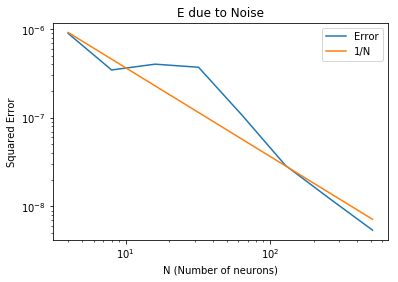

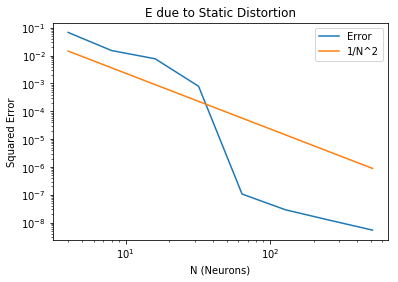

In [7]:
#Question 1.2a
def Question12a(sigma):
    print("Sigma is: "+ str(sigma))
    def eNoise(sigma, D):
        return (sigma*sigma)*(np.sum(np.square(D)))
    
    def eDistortion(x, xhat, sigma, D):
        #total error minus error due to noise, taken abs to account for imprecision at the smaller values
        return abs(np.average((x - xhat)**2) - eNoise(sigma, D))

    Ns = [4., 8., 16., 32., 64., 128., 256., 512.]
    eDs = np.zeros(shape(Ns))
    eNs = np.zeros(shape(Ns))
    for i in range(0, size(Ns)): #number neurons
        eD_total = 0;
        eN_total = 0;
        averaging = 5 #averaging over 5
        for j in range(0,averaging):
            A = np.zeros(shape=(size(x), int(Ns[i])))
            for k in range(0, int(Ns[i])):
                m = np.random.randint(0, size(gains))
                neuron = RectifiedLinear(gains[m], biases[m], es[m]);
                a = neuron.tuningSimple(x)
                A[:, k] = a
            An = A + np.random.normal(scale=sigma*np.max(A), size=shape(A))
            #My namings going a bit wonky cuz I cant remember what Ive already used
            Decs = BaseNeuron.decode(An, x, sigma) 
            xhatz = np.dot(An, Decs)
            eD_total += eDistortion(x, xhatz, sigma, Decs)
            eN_total += eNoise(sigma, Decs)

        eD_average = eD_total/averaging
        eN_average = eN_total/averaging
        eDs[i] = eD_average
        eNs[i] = eN_average
    
    def inv(i, A):
        return A/i
    def invSquared(i, A):
        return A/(np.square(i))
    
    figure()
    plot(Ns, eNs, label="Error")
    init_guess = [5]
    paramz = curve_fit(inv, Ns, eNs, p0=init_guess)
    data_fit = inv(Ns, *paramz[0])
    plot(Ns, data_fit, label='1/N')
    legend()
    yscale('log')
    xscale('log')
    title('E due to Noise')
    xlabel('N (Number of neurons)')
    ylabel('Squared Error')
    
    figure()
    plot(Ns, eDs, label="Error")
    init_guess = [1]
    paramz = curve_fit(inv, Ns, eDs, p0=init_guess)
    data_fit = invSquared(Ns, *paramz[0])
    plot(Ns, data_fit, label='1/N^2')
    legend()
    yscale('log')
    xscale('log')
    title('E due to Static Distortion')
    xlabel('N (Neurons)')
    ylabel('Squared Error')
    print("Please note the curve may not fit exactly due to low number of times averaged")
    print("If you increase averging to ~25 you'll notice the curves align very nicely")

Question12a(sigma=0.1)

Sigma is: 0.01
Please note the curve may not fit exactly due to low number of times averaged
If you increase averging to ~25 you'll notice the curves align very nicely


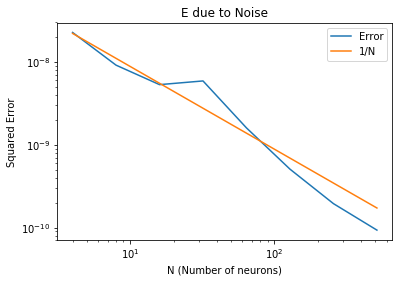

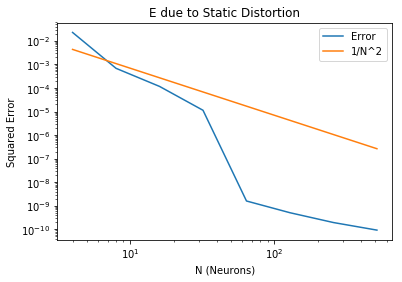

In [8]:
#Question 1.2b
Question12a(sigma=0.01)

Question 1.2c

The difference between the graphs shows us that smaller neural populations are effected by changes in noise much more than larger populations. A one order of magnitude increase yields roughly a two order of magnitude increase in error at high higher values of N. That being said the error is still rather small, implying that up to at least 10% standard deviation, neural populations are fairly resistant against noise.

Text(0,0.5,'firing rate (Hz)')

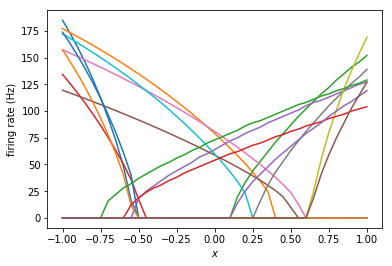

In [17]:
#Question 1.3a
from LIF import LIF

#num neurons
N = 16

es = np.random.choice([-1, 1], size=N) #Array of encoders
xInts = np.random.uniform(-0.95, 0.95, N)
max_rates = np.random.uniform(100, 200, N)

x = np.arange(-1,1.05,0.05)
A = np.zeros(shape=(size(x),N))

for i in range(0, N):
    neuron = LIF(0, 0, es[i]);
    neuron.setParamsMax(es[i], max_rates[i], xInts[i])
    a = neuron.tuningSimple(x)
    A[:, i] = a

figure()
pyplot.plot(x, A)
xlabel('$x$')
ylabel('firing rate (Hz)')

No noise, decoder accounted for noise: RMSE 0.21475
No noise, simple decoder: RMSE 0.009487
With noise, decoder accounted for noise: RMSE 0.377925
With noise, simple decoder: RMSE 0.836018


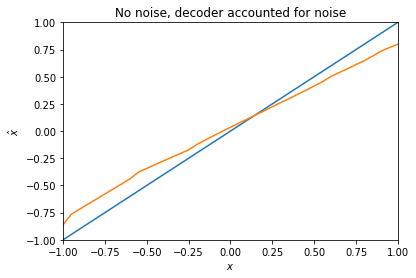

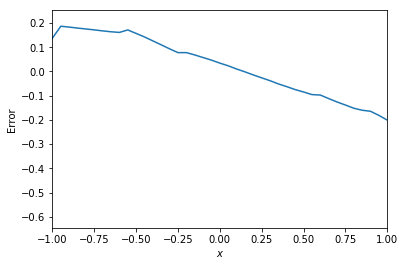

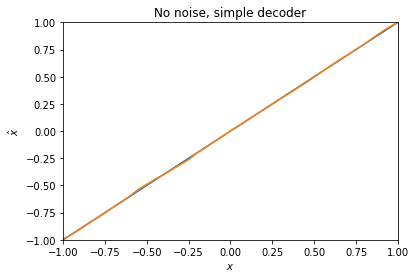

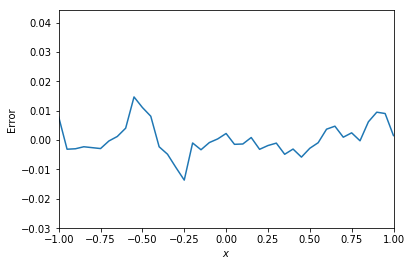

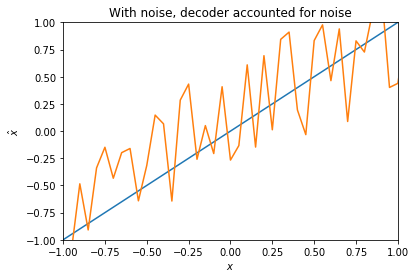

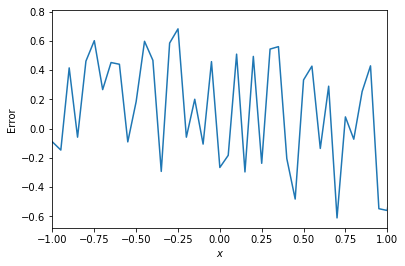

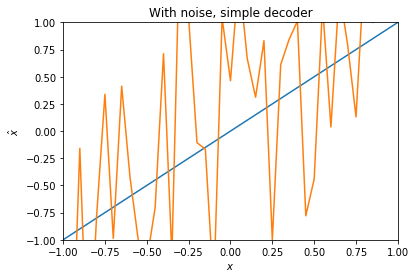

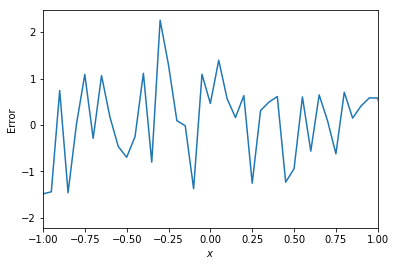

In [10]:
#Questions 1.3b
sigma = 0.2
S = size(x)

An = A + np.random.normal(scale=sigma*np.max(A), size=shape(A))

D = BaseNeuron.decode(An, x, sigma)
D2 = BaseNeuron.decodeIdeal(A, x)

xhat = np.dot(A, D)
xhat2 = np.dot(A, D2)
xhat3 = np.dot(An, D)
xhat4 = np.dot(An, D2)
error = xhat - x
error2 = xhat2 - x
error3 = xhat3 - x
error4 = xhat4 - x

figure()
plot(x, x)
plot(x, xhat)
title('No noise, decoder accounted for noise')
xlabel('$x$')
ylabel('$\hat{x}$')
ylim(-1, 1)
xlim(-1, 1)

figure()
plot(x, error)
xlabel('$x$')
ylabel('Error')
xlim(-1, 1)

RMSE = np.sqrt(np.average(error**2))
print('No noise, decoder accounted for noise: RMSE %g' % RMSE)

figure()
plot(x, x)
plot(x, xhat2)
title('No noise, simple decoder')
xlabel('$x$')
ylabel('$\hat{x}$')
ylim(-1, 1)
xlim(-1, 1)

figure()
plot(x, error2)
xlabel('$x$')
ylabel('Error')
xlim(-1, 1)

RMSE2 = np.sqrt(np.average(error2**2))
print('No noise, simple decoder: RMSE %g' % RMSE2)

figure()
plot(x, x)
plot(x, xhat3)
title('With noise, decoder accounted for noise')
xlabel('$x$')
ylabel('$\hat{x}$')
ylim(-1, 1)
xlim(-1, 1)

figure()
plot(x, error3)
xlabel('$x$')
ylabel('Error')
xlim(-1, 1)

RMSE3 = np.sqrt(np.average(error3**2))
print('With noise, decoder accounted for noise: RMSE %g' % RMSE3)

figure()
plot(x, x)
plot(x, xhat4)
title('With noise, simple decoder')
xlabel('$x$')
ylabel('$\hat{x}$')
ylim(-1, 1)
xlim(-1, 1)

figure()
plot(x, error4)
xlabel('$x$')
ylabel('Error')
xlim(-1, 1)

RMSE4 = np.sqrt(np.average(error4**2))
print('With noise, simple decoder: RMSE %g' % RMSE4)

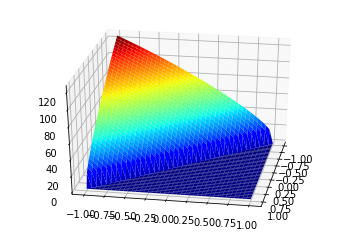

In [11]:
#Question 2.1a
e_pref = (-1./np.sqrt(2), -1./np.sqrt(2))
neuron = LIF(0, 0, e_pref);
neuron.setParamsMax(e_pref, 100, 0)

X,Y = np.mgrid[-1:1.05:0.05, -1:1.05:0.05]
xy = np.vstack((X.flatten(), Y.flatten())).T

A = neuron.tuningSimple(xy)
A2 = reshape(A,X.shape)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
p = ax.plot_surface(X, Y, A2, linewidth=1, cstride=1, rstride=1, cmap=pylab.cm.jet)
ax.view_init(30, 10)
plt.draw()

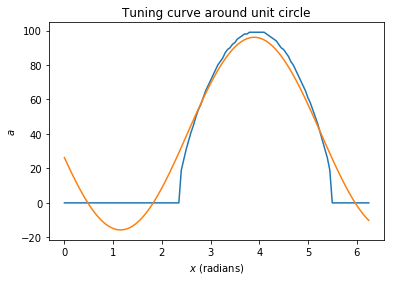

In [12]:
#Question 2.1b
angles_ = np.arange(0, 2*np.pi, 0.05)
x2, y2 = np.cos(angles_), np.sin(angles_)
xy2 = np.vstack((x2.flatten(), y2.flatten())).T
A = neuron.tuningSimple(xy2)
figure()
plot(angles_, A)
title('Tuning curve around unit circle')
xlabel('$x$ (radians)')
ylabel('$a$')

def my_cos(x, A, B, C, D):
    return A*np.sin(x * B + C) + D
init_guess = [100, 1, 4, 40]
paramz = curve_fit(my_cos, angles_, A, p0=init_guess)
data_fit = my_cos(angles_, *paramz[0])
A,B,C,D = paramz[0][0], paramz[0][1], paramz[0][2], paramz[0][3]
plot(angles_, data_fit)


A cosine is a good function to approximate the tuning curve because the encoder lies on the negative y axis
and as you sweep across the unit circle you get a sinusoidal bump as your x starts to get a larger negative y
component. Of course this won't be exact as the function has a minimum current cutoff (hence why we don't see
a negative component in the tuning curve), and the fitted curve attempts to account for the zeros on the 
tuning curve.

Text(0,0.5,'y')

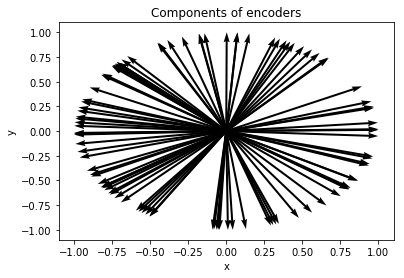

In [13]:
#Question 2.2a
n = 100
angles = np.random.uniform(0, 2*np.pi,n)
def unitVector(x):
    return (np.cos(x), np.sin(x))

origin = np.zeros(n)
U, V = unitVector(angles)
figure()
quiver(np.zeros(n), np.zeros(n), U, V, angles='xy', scale_units='xy', scale=1)
xlim(-1.1,1.1)
ylim(-1.1,1.1)
title("Components of encoders")
xlabel('x')
ylabel('y')

In [14]:
#Question 2.2b
N = 100
A = np.zeros(shape=(size(X),N))
for i in range(0, N):
    ei = (U[i], V[i])
    neuron = LIF(0, 0, ei);
    neuron.setParams(ei, 100, (0,0))
    a = neuron.tuningSimple(xy)
    A[:, i] = a
    
An = A + np.random.normal(scale=sigma*np.max(A), size=shape(A))
D = BaseNeuron.decode(An,xy,sigma)
print("The decoders are: ")
print(D)

TypeError: setParams() takes 3 positional arguments but 4 were given

In [ ]:
#Question 2.2c
n = 20
length = np.random.uniform(0, 1, n)
angle_ = np.pi * np.random.uniform(0, 2, n)

x = length * np.cos(angle_)
y = length * np.sin(angle_)

A = np.zeros(shape=(size(x),N))
xy = np.vstack((x.flatten(), y.flatten())).T

for i in range(0, n):
    ei = (U[i], V[i])
    neuron = LIF(0, 0, ei);
    neuron.setParams(ei, 100, (0,0))
    a = neuron.tuningSimple(xy)
    A[:, i] = a

An = A + np.random.normal(scale=sigma*np.max(A), size=shape(A))
D = BaseNeuron.decode(An,xy,sigma)
xhat = np.dot(An, D)
error = xy - xhat

figure()
# plot(x, xy)
scatter(xy[:,0], xy[:,1], color="red")
scatter(xhat[:,0], xhat[:,1], color="blue")
title('2D x and xhat (x is red, might be hidden under xhat)')
xlabel('$x$')
ylabel('$y$')

RMSE = np.sqrt(np.average(error**2))
print('RMSE %g' % RMSE)

In [ ]:
#Question 2.2d
E = np.zeros(shape(D))
E[:,0] = U
E[:,1] = V
xhat2 = np.dot(An, E)
error2 = xy - xhat2

figure()
scatter(xy[:,0], xy[:,1], color="red")
scatter(xhat2[:,0], xhat2[:,1], color="blue")
title('2D x (blue) and xhat (red)')
xlabel('$x$')
ylabel('$y$')

RMSE2 = np.sqrt(np.average(error2**2))
print('RMSE %g' % RMSE2)

xhat3 = xhat2/1000

figure()
scatter(xy[:,0], xy[:,1], color="red")
scatter(xhat3[:,0], xhat3[:,1], color="blue")
title('2D x (red) and xhat (blue) scaled down by 1000x')
xlabel('$x$')
ylabel('$y$')

Although the magnitude of the output is now very off, we notice that the shape is not 'too bad'. Scaling down by a few orders of magnitude reveals we're ballparking the same region. Now let's quantify this by normalizing and check our RMSE's again


In [ ]:
D_norm = D/np.linalg.norm(D)
E_norm = E/np.linalg.norm(E)

xhat4 = np.dot(An, D_norm)
xhat5 = np.dot(An, E_norm)

error4 = xhat4 - xy
error5 = xhat5 - xy

#I really should have placed this RMSE thing in a function...
RMSE4 = np.sqrt(np.average(error4**2))
print('RMSE %g' % RMSE4)

RMSE5 = np.sqrt(np.average(error5**2))
print('RMSE %g' % RMSE5)

So we see the RMSE's are within the same order of magnitude, and not "too" far off. This method wouldn't be bad if accuracy was not too much of a concern compared to speed, as it would look relatively straightforward to just throw in the encoders as the decoders. 